# IEEE-CIS Fraud Detection Kaggle competition
###### Solução - Endrew Rossin - Parte 1 ( Análise exploratória de dados ).

O objetivo desta competição é prever a probabilidade de uma transação financeira online ser fraudulenta, conforme indicado pelo target binário 'isFraud'.

Analisei um conjunto de dados com aproximadamente 1,1 milhão de linhas e 434 colunas. Os dados são provenientes das transações de comércio eletrônico do mundo real da Vesta Corporation e contêm uma ampla variedade de features, do tipo de dispositivo até o produto. A grande maioria das features tem seu significado secreto, e seus valores modificados para não serem identificados.

Os dados são divididos em dois arquivos de identidade e transação, os dois tem a coluna TransactionID. Nem todas as transações possuem informações de identidade correspondentes.

A métrica utilizada para avaliar o modelo é a area sob a ROC curve.

Para mais informações sobre a competição: https://www.kaggle.com/c/ieee-fraud-detection/overview

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

Faço o load nos arquivos disponibilizados na competição.

In [2]:
df_i = pd.read_csv('train_identity.csv')
df_t = pd.read_csv('train_transaction.csv')
dfsol_i = pd.read_csv('test_identity.csv')
dfsol_t = pd.read_csv('test_transaction.csv')

Faço o merge no ID da transação com os arquivos disponibilizados em treino e teste. Deleto os dataframes inicias para liberar espaço na memória e imprimo o shape dos dataframes criados.

In [3]:
dftrain = pd.merge(df_i,df_t,on='TransactionID',how='outer')
print('Teino: {:} linhas e {:} colunas'.format(dftrain.shape[0], dftrain.shape[1]))
del df_t, df_i

dftest = pd.merge(dfsol_i,dfsol_t,on='TransactionID',how='outer')
print('Teste: {:} linhas e {:} colunas'.format(dftest.shape[0], dftest.shape[1]))
del dfsol_t, dfsol_i

print('Total: {:} linhas e {:} colunas'.format(dftest.shape[0]+dftrain.shape[0], dftrain.shape[1]))

Teino: 590540 linhas e 434 colunas
Teste: 506691 linhas e 433 colunas
Total: 1097231 linhas e 434 colunas


Podemos visualizar como está o dataframe inicial

In [4]:
dftrain.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,18.0,140.0,0.0,0.0,0.0,0.0,1803.0,49.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,15557.990234,169690.796875,0.0,0.0,0.0,515.0,5155.0,2840.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.00000

Realizo uma contagem de tipos de cada coluna, a maioria é numérica mas temos 31 categóricas.

In [5]:
ctype = dftrain.dtypes.reset_index()
ctype.columns = ['Count', 'Column Type']
ctype.groupby('Column Type').aggregate('count').reset_index()

,Column Type,Count
0,int64,4
1,float64,399
2,object,31


Dando uma olhada mais detalhada nas colunas categóricas, podemos perceber que a coluna DeviceInfo tem um número grande de classes.

In [6]:
dftrain.describe(include=['O'])

,id_12,id_15,id_16,id_23,id_27,id_28,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
count,144233,140985,129340,5169,5169,140978,140978,77565,140282,73289,77805,140985,140985,140985,140985,140810,118666,590540,588963,588969,496084,137291,319440,319440,319440,309096,240058,421180,244275,244288,244288
unique,2,3,2,3,2,2,2,75,130,260,4,2,2,2,2,2,1786,5,4,4,59,60,2,2,2,3,2,2,2,2,2
top,NotFound,Found,Found,IP_PROXY:TRANSPARENT,Found,Found,Found,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows,W,visa,debit,gmail.com,gmail.com,T,T,T,M0,F,F,F,F,T
freq,123025,67728,66324,3489,5155,76232,74926,21155,22000,16874,60011,77814,134066,110452,73922,85165,47722,439670,384767,439938,228355,57147,319415,285468,251731,196405,132491,227856,211374,155251,205656


Faço uma contagem de valores nulos nas colunas, e muitas colunas apresentam uma grande quantidade de valores nulos.

In [7]:
missing_df = dftrain.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count
392,V298,12
397,V303,12
396,V302,12
393,V299,12
374,V280,12
391,V297,12
373,V279,12
380,V286,12
389,V295,12
387,V293,12


Ao medir a correlação das features com o Target, as que apresentam maiores correlações positivas e negativas são V257, V246, V244, V242, V201, V49, V48, id_01, D7, D8. O significado destas features é mantido em sigilo pela competição.

In [8]:
print(dftrain.corrwith(dftrain['isFraud'], axis=0, method='pearson').sort_values(ascending = False).head(6))
print(dftrain.corrwith(dftrain['isFraud'], axis=0, method='pearson').sort_values(ascending = False).tail())

isFraud    1.000000
V257       0.383060
V246       0.366878
V244       0.364129
V242       0.360590
V201       0.328005
dtype: float64
V49     -0.110920
V48     -0.115786
id_01   -0.120099
D7      -0.127199
D8      -0.142636
dtype: float64


## Quantidade, DateTime, Produto e Cartões

In [9]:
dftrain.iloc[:,41:51].head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6
0,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,credit
1,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,debit
2,0,86549,75.887,C,16496,352.0,117.0,mastercard,134.0,credit
3,0,86555,16.495,C,4461,375.0,185.0,mastercard,224.0,debit
4,0,86620,30.000,H,1790,555.0,150.0,visa,226.0,debit


Para analisar as transações, faço um plot das transações no tempo, dos dados de treino e teste.

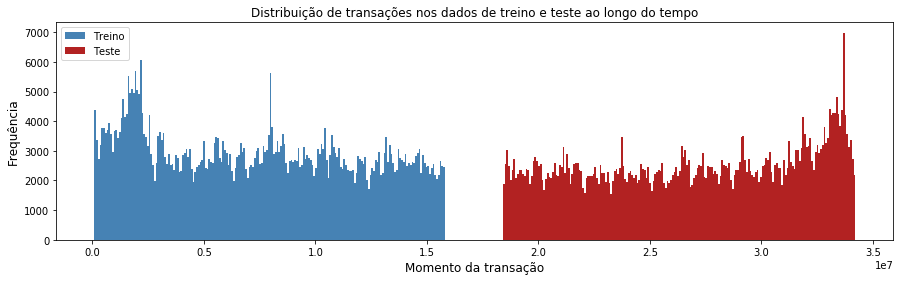

In [10]:
dftrain['TransactionDT'].plot(kind='hist',
                            figsize=(15, 4),
                            label='Treino',
                            bins=200,
                            title='Distribuição de transações nos dados de treino e teste ao longo do tempo',
                            color='steelblue')
dftest['TransactionDT'].plot(kind='hist',
                           label='Teste',
                           bins=200,
                           color='firebrick')
plt.xlabel('Momento da transação', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.legend()
plt.show()

Analisando o gráfico percebe-se um espaço entre os dados de treino e de teste, também percebe-se uma maior quantidade de transações no começo dos dados de treino e também no final dos dados de teste.

Se considerarmos que o número que foi utilizado para marcar o tempo na competição são segundos, então podemos transformá-los em minutos, e horas. 

In [11]:
dftrain.TransactionDT[0]/60/60

24.029444444444444

O resultado são 24 horas, o que corresponde a 1 dia. Considerando que nos primeiros dias as transações foram altas, podemos considerar que é o período de fim de ano e festas. Então provavelmente a medição começa no início de dezembro e termina no final de dezembro do ano seguinte, possivelmente 2018 pois seriam os dados mais recentes.

Crio outro plot para observar a quantidade de fraudes em relação a quantidade de não fraudes.

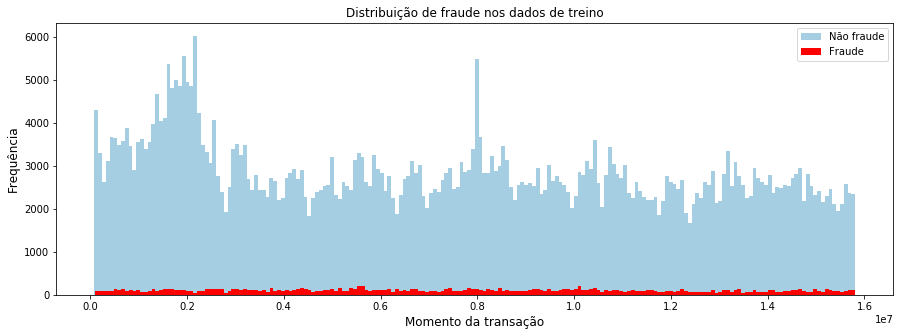

In [12]:
dftrain[dftrain['isFraud'] == 0]['TransactionDT'].plot(kind='hist',
                            figsize=(15, 5),
                            label='Não fraude',
                            bins=200,
                            title='Distribuição de fraude nos dados de treino',
                            colormap='Paired')
dftrain[dftrain['isFraud'] == 1]['TransactionDT'].plot(kind='hist',
                           label='Fraude',
                           bins=200,
                           colormap='autumn')
plt.xlabel('Momento da transação', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.legend()
plt.show()

In [13]:
print ('A porcentagem de fraude nos dados de treino é {:.2f}%'.format(dftrain['isFraud'].mean() * 100))

A porcentagem de fraude nos dados de treino é 3.50%


Crio um plot para verificar a distribuição da quantidade gasta em transações fraudulentas e não fraudulentas.

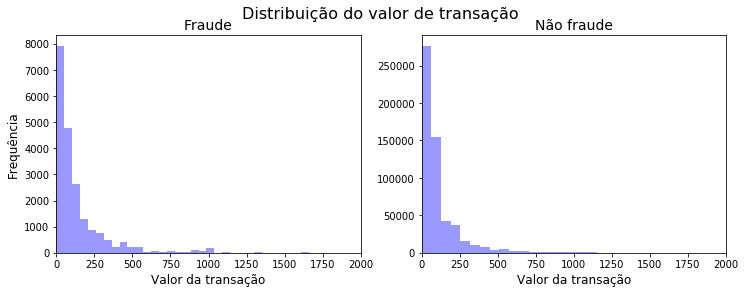

In [14]:
plt.figure(figsize=(12,4))
plt.suptitle('Distribuição do valor de transação', fontsize=16)
plt.subplot(1,2,1)
sns.distplot(dftrain[dftrain.isFraud == 1].TransactionAmt, bins=100, kde=False, color='blue')
plt.title('Fraude', fontsize=14)
plt.xlabel('Valor da transação', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xlim(0,2000)
plt.subplot(1,2,2)
sns.distplot(dftrain[dftrain.isFraud == 0].TransactionAmt, bins=500, kde=False, color='blue')
plt.title('Não fraude', fontsize=14)
plt.xlabel('Valor da transação', fontsize=12)
plt.xlim(0,2000)
plt.show()

Apesar da escala em Y ficar bastante diferente, a distribuição acaba ficando bem parecida. Os plots foram limitados em valores até 2000 para serem melhores visualizados devido à presença de outliers.

In [15]:
print('Valor médio das transações fraudulentas {:.2f}'.format(dftrain[dftrain.isFraud == 1].TransactionAmt.mean()))
print('Valor médio das transações sem fraude {:.2f}'.format(dftrain[dftrain.isFraud == 0].TransactionAmt.mean()))

Valor médio das transações fraudulentas 149.24
Valor médio das transações sem fraude 134.51


O valor médio das transações também é semelhante.

Analisando a coluna de produtos, vemos que os produtos "W" são os que tem maior numero de compras.

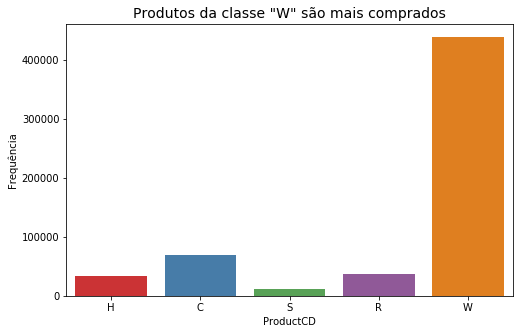

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x="ProductCD", data=dftrain, palette='Set1')
plt.title('Produtos da classe "W" são mais comprados', fontsize=14)
plt.ylabel('Frequência')
plt.show()

Mas ao analisar a porcentagem de fraude, percebemos que o produto "C" se destaca.

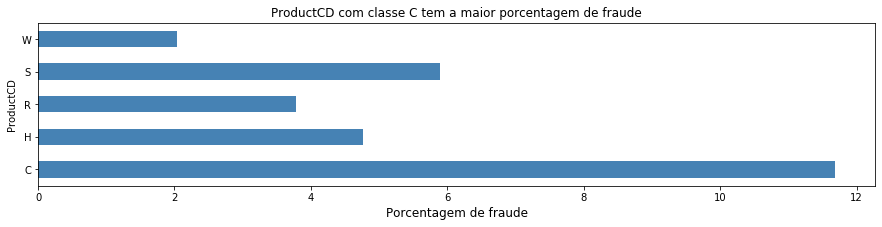

In [17]:
(dftrain.groupby('ProductCD')['isFraud'].mean()*100).sort_index().plot(kind='barh',
            figsize=(15, 3),
            title='ProductCD com classe C tem a maior porcentagem de fraude',
            color='steelblue')
plt.xlabel('Porcentagem de fraude', fontsize=12)
plt.show()

Entre as bandeiras, a Discover também tem uma taxa de fraude que se destaca das demais.

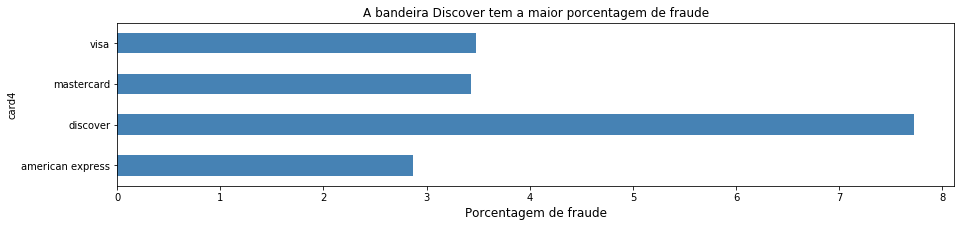

In [18]:
(dftrain.groupby('card4')['isFraud'].mean()*100).sort_index().plot(kind='barh',
            figsize=(15, 3),
            title='A bandeira Discover tem a maior porcentagem de fraude',
            color='steelblue')
plt.xlabel('Porcentagem de fraude', fontsize=12)
plt.show()

Analisando a porcentagem de fraude entre crédito e débito, também é possível perceber há uma diferença notável. 

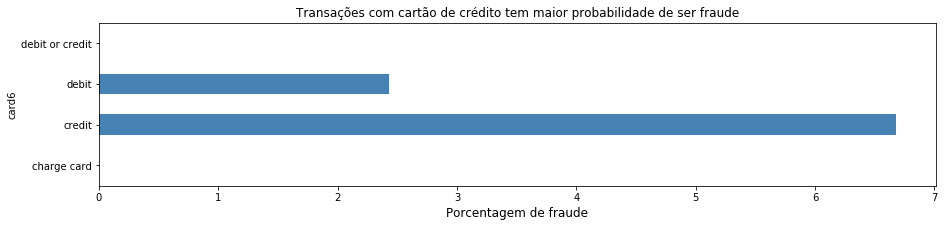

In [19]:
(dftrain.groupby('card6')['isFraud'].mean()*100).sort_index().plot(kind='barh',
            figsize=(15, 3),
            title='Transações com cartão de crédito tem maior probabilidade de ser fraude',
            color='steelblue')
plt.xlabel('Porcentagem de fraude', fontsize=12)
plt.show()

# Addr , Dist e Email

In [20]:
dftrain.iloc[:,51:57].head()

,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain
0,420.0,87.0,NaN,NaN,gmail.com,NaN
1,337.0,87.0,NaN,NaN,anonymous.com,NaN
2,NaN,NaN,NaN,NaN,gmail.com,gmail.com
3,NaN,NaN,NaN,30.0,hotmail.com,hotmail.com
4,170.0,87.0,NaN,NaN,aol.com,NaN


Analisando a quantidade de valores nulos, é muito maior para os e-mails do recebedor do que do comprador.

In [21]:
print('Valores em P_emaildomain: {:.2f}, Valores NaN: {:.2f}'.format(dftrain.P_emaildomain.notnull().sum(),
                                                               dftrain.P_emaildomain.isna().sum()))
print('Valores em R_emaildomain: {:.2f}, Valores NaN: {:.2f}'.format(dftrain.R_emaildomain.notnull().sum(),
                                                               dftrain.R_emaildomain.isna().sum()))

Valores em P_emaildomain: 496084.00, Valores NaN: 94456.00
Valores em R_emaildomain: 137291.00, Valores NaN: 453249.00


São utilizados emails de diversas companhias, o mais utilizado é o gmail.

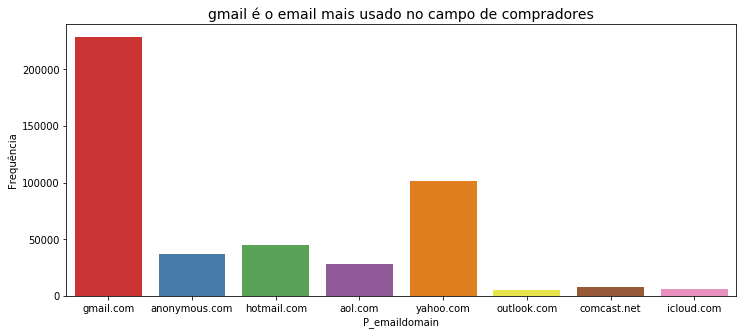

In [22]:
plt.figure(figsize=(12,5))
sns.countplot(x="P_emaildomain", data=dftrain[dftrain.P_emaildomain.fillna('nan').map((dftrain.P_emaildomain.fillna('nan').value_counts() >= 5000).to_dict())], palette='Set1')
plt.title('gmail é o email mais usado no campo de compradores', fontsize=14)
plt.ylabel('Frequência')
plt.show()

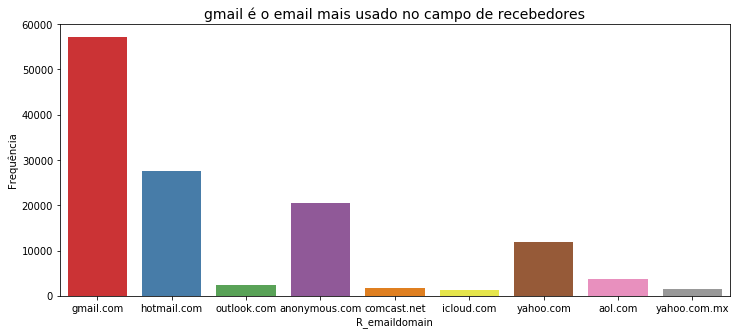

In [23]:
plt.figure(figsize=(12,5))
sns.countplot(x="R_emaildomain", data=dftrain[dftrain.R_emaildomain.fillna('nan').map((dftrain.R_emaildomain.fillna('nan').value_counts() >= 1000).to_dict())], palette='Set1')
plt.title('gmail é o email mais usado no campo de recebedores', fontsize=14)
plt.ylabel('Frequência')
plt.show()

Entre os domínios de e-mails, o que tem um padrão mais destacado de fraude é o protonmail.com 

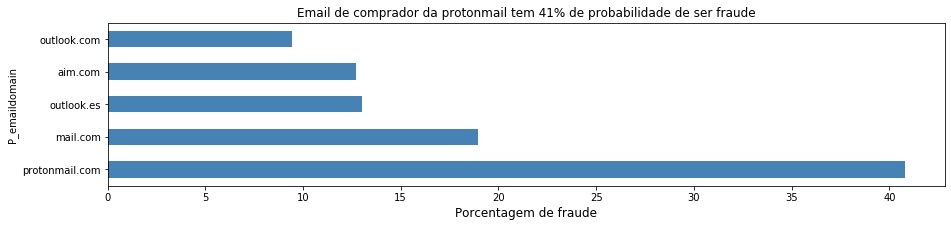

In [24]:
(dftrain.groupby('P_emaildomain')['isFraud'].mean()*100).sort_index().sort_values(ascending = False).head().plot(kind='barh',
            figsize=(15, 3),
            title='Email de comprador da protonmail tem 41% de probabilidade de ser fraude',
            color='steelblue')
plt.xlabel('Porcentagem de fraude', fontsize=12)
plt.show()

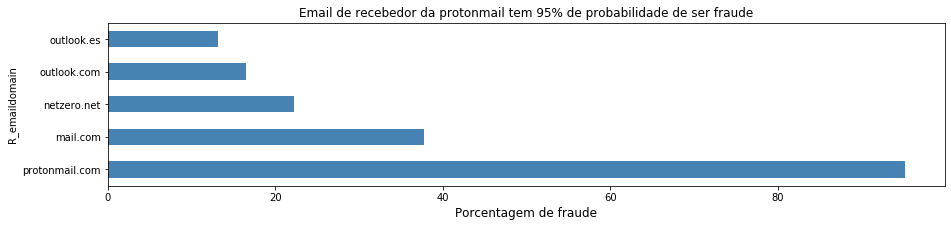

In [25]:
(dftrain.groupby('R_emaildomain')['isFraud'].mean()*100).sort_index().sort_values(ascending = False).head().plot(kind='barh',
            figsize=(15, 3),
            title='Email de recebedor da protonmail tem 95% de probabilidade de ser fraude',
            color='steelblue')
plt.xlabel('Porcentagem de fraude', fontsize=12)
plt.show()

# C1 - C14

In [26]:
dftrain.iloc[:,57:71].head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
2,1.0,4.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0


As variáveis em "C" não apresentam valores nulos.

In [27]:
for n in range(1,15):
    n = str(n)
    print(str('C'+n),'Valores: {:.2f}, NaN: {:.2f}'.format(dftrain[str('C'+n)].notnull().sum(),dftrain[str('C'+n)].isnull().sum()))

C1 Valores: 590540.00, NaN: 0.00
C2 Valores: 590540.00, NaN: 0.00
C3 Valores: 590540.00, NaN: 0.00
C4 Valores: 590540.00, NaN: 0.00
C5 Valores: 590540.00, NaN: 0.00
C6 Valores: 590540.00, NaN: 0.00
C7 Valores: 590540.00, NaN: 0.00
C8 Valores: 590540.00, NaN: 0.00
C9 Valores: 590540.00, NaN: 0.00
C10 Valores: 590540.00, NaN: 0.00
C11 Valores: 590540.00, NaN: 0.00
C12 Valores: 590540.00, NaN: 0.00
C13 Valores: 590540.00, NaN: 0.00
C14 Valores: 590540.00, NaN: 0.00


Olhando o heatmap da matriz de correlação, parece que as variáveis de "C" apresentam um problema de multicolinearidade. Usar um modelo de árvores pode resolver esse problema.

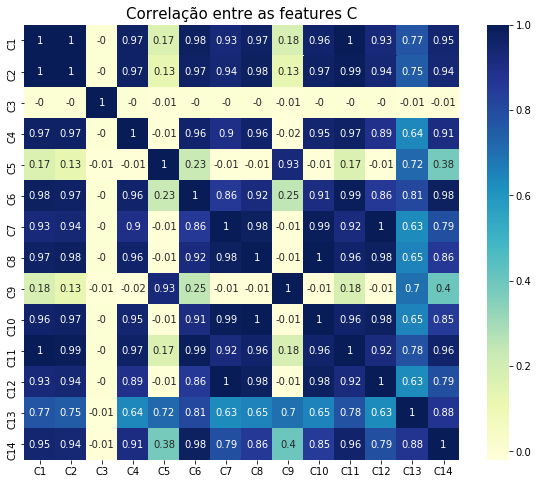

In [28]:
temp = dftrain.iloc[:,57:71]
corrmat = round(temp.corr(method='pearson'),2)
plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=1.0, square=True, cmap='YlGnBu', annot=True)
plt.title('Correlação entre as features C', fontsize=15)
plt.show()

# D1 - D15

In [29]:
dftrain.iloc[:,71:86].head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,83.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
3,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,26.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


Muitas colunas "D" tem mais de 500mil linhas nulas.

In [30]:
for n in range(1,16):
    n = str(n)
    print(str('D'+n),'Valores: {:.2f}, NaN: {:.2f}'.format(dftrain[str('D'+n)].notnull().sum(),dftrain[str('D'+n)].isnull().sum()))

D1 Valores: 589271.00, NaN: 1269.00
D2 Valores: 309743.00, NaN: 280797.00
D3 Valores: 327662.00, NaN: 262878.00
D4 Valores: 421618.00, NaN: 168922.00
D5 Valores: 280699.00, NaN: 309841.00
D6 Valores: 73187.00, NaN: 517353.00
D7 Valores: 38917.00, NaN: 551623.00
D8 Valores: 74926.00, NaN: 515614.00
D9 Valores: 74926.00, NaN: 515614.00
D10 Valores: 514518.00, NaN: 76022.00
D11 Valores: 311253.00, NaN: 279287.00
D12 Valores: 64717.00, NaN: 525823.00
D13 Valores: 61952.00, NaN: 528588.00
D14 Valores: 62187.00, NaN: 528353.00
D15 Valores: 501427.00, NaN: 89113.00


Algumas colunas "D" tem grande correlação com outras.

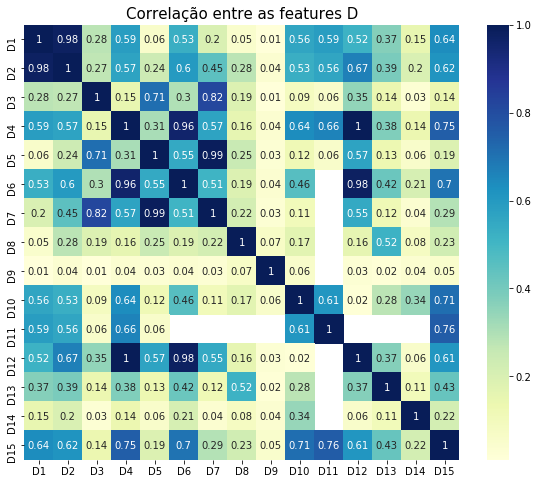

In [31]:
temp = dftrain.iloc[:,71:86]
corrmat = round(temp.corr(method='pearson'),2)
plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=1.0, square=True, cmap='YlGnBu', annot=True)
plt.title('Correlação entre as features D', fontsize=15)
plt.show()

# M1 - M9

In [32]:
dftrain.iloc[:,86:95].head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,M0,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,M0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As colunas "M" também tem uma grande quantidade de valores nulos.

In [33]:
for n in range(1,10):
    n = str(n)
    print(str('M'+n),'Valores: {:.2f}, NaN: {:.2f}'.format(dftrain[str('M'+n)].notnull().sum(),dftrain[str('M'+n)].isnull().sum()))

M1 Valores: 319440.00, NaN: 271100.00
M2 Valores: 319440.00, NaN: 271100.00
M3 Valores: 319440.00, NaN: 271100.00
M4 Valores: 309096.00, NaN: 281444.00
M5 Valores: 240058.00, NaN: 350482.00
M6 Valores: 421180.00, NaN: 169360.00
M7 Valores: 244275.00, NaN: 346265.00
M8 Valores: 244288.00, NaN: 346252.00
M9 Valores: 244288.00, NaN: 346252.00


Dentre as colunas "M", a única coluna categórica é a coluna M4, e nela é possível perceber que a classe M2 tem uma quantidade de fraude que se destaca.

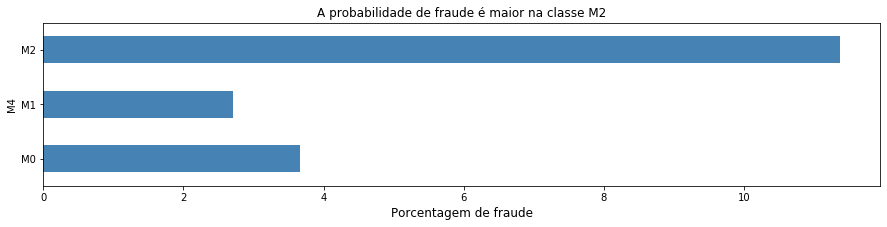

In [34]:
(dftrain.groupby('M4')['isFraud'].mean()*100).sort_index().plot(kind='barh',
            figsize=(15, 3),
            title='A probabilidade de fraude é maior na classe M2',
            color='steelblue')
plt.xlabel('Porcentagem de fraude', fontsize=12)
plt.show()

# id's

As colunas id's tem algumas variáveis categóricas que podem ser identificadas, como por exemplo a versão do sistema do celular ou do PC, e a resolução da tela.

In [35]:
dftrain.iloc[:,1:41].head()

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


Olhando para o sistema do celular, é possível perceber que um sistema classificado como other, que provavelmente é menos difundido, tem maior probabilidade de fraude.

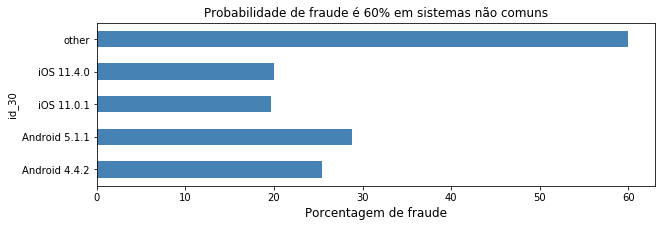

In [36]:
(dftrain.groupby('id_30')['isFraud'].mean()*100).sort_index().sort_values(ascending = False).head().sort_index().plot(kind='barh',
            figsize=(10, 3),
            title='Probabilidade de fraude é 60% em sistemas não comuns',
            color='steelblue')
plt.xlabel('Porcentagem de fraude', fontsize=12)
plt.show()

A resolução da tela tem um número grande de classes, e algumas tem poucos dados. Por este motivo algumas tem 100% de chance de fraude.

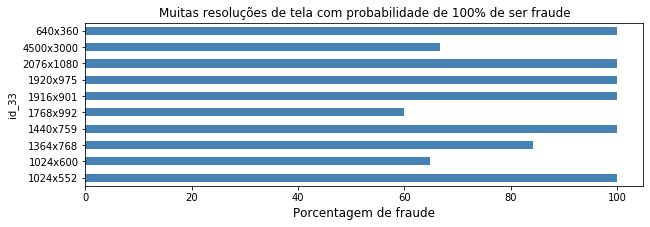

In [37]:
(dftrain.groupby('id_33')['isFraud'].mean()*100).sort_index().sort_values(ascending = False).head(10).sort_index().plot(kind='barh',
            figsize=(10, 3),
            title='Muitas resoluções de tela com probabilidade de 100% de ser fraude',
            color='steelblue')
plt.xlabel('Porcentagem de fraude', fontsize=12)
plt.show() #trocar por value counts

In [38]:
print('São {:} resoluções de tela com 5 ou menos coletas de dados.'.format((dftrain.id_33.value_counts() <=5).sum()))

São 161 resoluções de tela com 5 ou menos coletas de dados.


Também é possível perceber que a quantidade de fraude em aparelhos mobile se destaca.

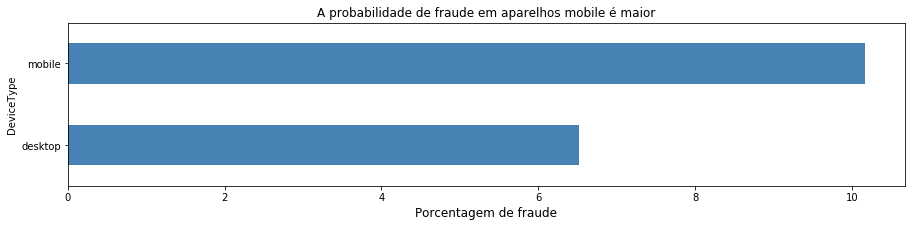

In [39]:
(dftrain.groupby('DeviceType')['isFraud'].mean()*100).sort_index().plot(kind='barh',
            figsize=(15, 3),
            title='A probabilidade de fraude em aparelhos mobile é maior',
            color='steelblue')
plt.xlabel('Porcentagem de fraude', fontsize=12)
plt.show()

# V1 - V399

São 339 colunas que não tem informação sobre o que representam do organizador da competição.

In [40]:
dftrain.iloc[:,95:434].head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,18.0,140.0,0.0,0.0,0.0,0.0,1803.0,49.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,15557.990234,169690.796875,0.0,0.0,0.0,515.0,5155.0,2840.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,18.0,140.0,0.0,0.0,0.0,0.0,1804.0,49.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,15607.990234,169740.796875,0.0,0.0,0.0,515.0,5155.0,2840.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1

Vemos que algumas tem poucos valores por classe, outras tem muitos, algumas tem valores baixos e outras altos.

In [41]:
dftrain.iloc[:,95:434].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,421571.000000,421571.000000,421571.000000,421571.00000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,590226.000000,590226.00000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,81945.000000,81945.000000,81945.000000,81945.000000,81945.000000,81951.000000,81951.000000,81951.000000,81945.000000,81945.000000,81945.000000,81945.000000,81951.000000,81951.000000,81951.000000,81945.000000,81945.000000,81945.000000,81945.000000,81945.000000,81945.000000,81951.000000,81951.000000,81945.000000,81945.000000,81945.000000,81951.000000,81951.000000,81951.000000,139631.000000,139631.000000,139819.000000,139819.000000,139819.000000,139631.000000,139631.000000,139819.000000,1

Algumas colunas têm um alto valor de dados nulos.  

In [42]:
for n in range(1,340):
    n = str(n)
    print(str('V'+n),'Valores: {:.2f}, NaN: {:.2f}'.format(dftrain[str('V'+n)].notnull().sum(),dftrain[str('V'+n)].isnull().sum()))

V1 Valores: 311253.00, NaN: 279287.00
V2 Valores: 311253.00, NaN: 279287.00
V3 Valores: 311253.00, NaN: 279287.00
V4 Valores: 311253.00, NaN: 279287.00
V5 Valores: 311253.00, NaN: 279287.00
V6 Valores: 311253.00, NaN: 279287.00
V7 Valores: 311253.00, NaN: 279287.00
V8 Valores: 311253.00, NaN: 279287.00
V9 Valores: 311253.00, NaN: 279287.00
V10 Valores: 311253.00, NaN: 279287.00
V11 Valores: 311253.00, NaN: 279287.00
V12 Valores: 514467.00, NaN: 76073.00
V13 Valores: 514467.00, NaN: 76073.00
V14 Valores: 514467.00, NaN: 76073.00
V15 Valores: 514467.00, NaN: 76073.00
V16 Valores: 514467.00, NaN: 76073.00
V17 Valores: 514467.00, NaN: 76073.00
V18 Valores: 514467.00, NaN: 76073.00
V19 Valores: 514467.00, NaN: 76073.00
V20 Valores: 514467.00, NaN: 76073.00
V21 Valores: 514467.00, NaN: 76073.00
V22 Valores: 514467.00, NaN: 76073.00
V23 Valores: 514467.00, NaN: 76073.00
V24 Valores: 514467.00, NaN: 76073.00
V25 Valores: 514467.00, NaN: 76073.00
V26 Valores: 514467.00, NaN: 76073.00
V27 Valore

V231 Valores: 130430.00, NaN: 460110.00
V232 Valores: 130430.00, NaN: 460110.00
V233 Valores: 130430.00, NaN: 460110.00
V234 Valores: 141416.00, NaN: 449124.00
V235 Valores: 130430.00, NaN: 460110.00
V236 Valores: 130430.00, NaN: 460110.00
V237 Valores: 130430.00, NaN: 460110.00
V238 Valores: 141416.00, NaN: 449124.00
V239 Valores: 141416.00, NaN: 449124.00
V240 Valores: 130430.00, NaN: 460110.00
V241 Valores: 130430.00, NaN: 460110.00
V242 Valores: 130430.00, NaN: 460110.00
V243 Valores: 130430.00, NaN: 460110.00
V244 Valores: 130430.00, NaN: 460110.00
V245 Valores: 141416.00, NaN: 449124.00
V246 Valores: 130430.00, NaN: 460110.00
V247 Valores: 130430.00, NaN: 460110.00
V248 Valores: 130430.00, NaN: 460110.00
V249 Valores: 130430.00, NaN: 460110.00
V250 Valores: 141416.00, NaN: 449124.00
V251 Valores: 141416.00, NaN: 449124.00
V252 Valores: 130430.00, NaN: 460110.00
V253 Valores: 130430.00, NaN: 460110.00
V254 Valores: 130430.00, NaN: 460110.00
V255 Valores: 141416.00, NaN: 449124.00


Terminamos aqui a parte de análise inicial dos dados, muitas outras informações acabaram sendo verificadas além destas ao longo da competição, mas devido à quantidade de colunas este notebook ficaria extremamente extenso e fugiria do propósito original. Para ver a parte 2 com a modelagem e as previsões entre no link: https://github.com/rossinendrew/Portfolio/blob/master/IEEE-Solution.ipynb